Q1) Problem 1. Consider learning a linear regression function (without bias term) as follows.
y = 3x1 + 4x2 + e (1)

Generate 500 samples in uniformly random manner with x1; x2  bounded [-10; 10]. Add a gaussian noise e with mean
= 0 and variance = 0.01 to each generated sample value y obtained from x1; x2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Gentrated Sample Data

In [2]:
x1 = np.random.uniform(-10,10,500)
x2 = np.random.uniform(-10,10,500)
noise = np.random.normal(0,0.01)
y = 3*x1 + 4*x2 + noise

Q1) Consider learning a linear regression function (without bias term). Hence, there will be two learnable parameters only. Assuming squared error loss function, write the objective function J to be minimized.

**Mean Square Error**

$$ J = min \quad \frac{\Sigma ((w_{1}-2)x_{1} + (w_{2}-3)x_{2}-noise)^{2}}{n} $$

Q2) Plot the error curve with respect to the parameters for this problem.

In [3]:
w1 = np.linspace(-60,60,40)
w2 = np.linspace(-60,60,40)
w1_new,w2_new=np.meshgrid(w1,w2)
error=0
for i in range(500):
  t1=(w1_new-2)*x1[i]
  t2=(w2_new-3)*x2[i]
  t_final=t1+t2
  error=error+np.square(t_final+-noise)

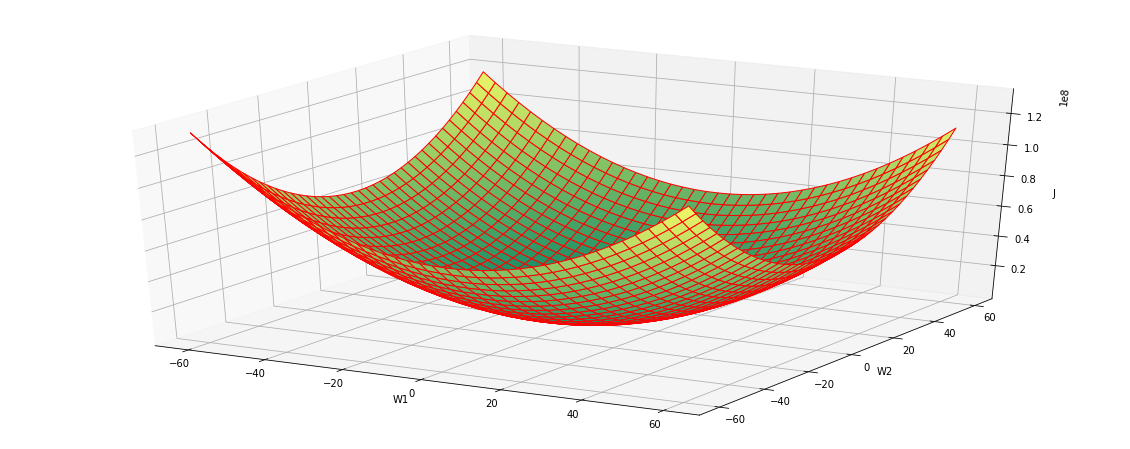

In [4]:
plt.figure(figsize = (20,8))
ax = plt.axes(projection='3d')
ax.plot_surface(w1_new,w2_new,error,rstride=1, cstride=1,cmap='summer', edgecolor='red')
ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('J')
plt.show()

**Question 3**: Consider minimizing J using gradient descent with constant step size ηopt. Calculate and explain the
optimal learning rate ηopt

**Answer** The loss function  is a quadratic function. For optimal learning rate = Inverse of Hessian of function.

Hessian of linear regression with euclidean distance is equal to $$ H =  X^{T}X.$$
$$ \eta_{opt} =  1/maxEigVal(H) $$

# **Optimized Value Of ηopt**

In [5]:
X = np.vstack((x1,x2)).T
bias=np.ones(500)
bias = np.reshape(bias,(-1,1))
X=np.hstack((X,bias))

In [6]:
Hessian=np.dot(X,np.transpose(X))
opt_eta = 2*1/max(np.linalg.eigvals(Hessian))

In [7]:
print(opt_eta)

(0.0001171776525381169+0j)


In [8]:
Y=[]
for i in range(500):
  Y.append(2*x1[i]+3*x2[i]+noise)

In [9]:
Y=np.array((Y))
Y=Y.reshape(-1,1)

In [10]:
Y.shape


(500, 1)

# **GRADIENT DESCENT**

In [17]:
def loss_function(X,y,theta):  
  N = len(y)
  MSE = (1/N) * np.sum(np.square(np.matmul(X, theta) - y))
  return(MSE)

def gradient_descent(X,Y,opt_eta,max_iter):
  losses=[]
  w_val=[]
  X1 = X
  m,n = np.shape(X1)
  N = len(y)
  theta = np.array((-60,-60,0))
  w_val.append(np.array((theta[0],theta[1])))
  theta = np.reshape(theta, (3,1))
  for i in range(0,max_iter):
    loss = loss_function(X1,Y,theta)
    predictions = np.matmul(X1,theta)
    step=((opt_eta*2)/N)*(X1.transpose().dot(predictions-Y))
    theta=theta-step
    losses.append(loss)
    w_val.append(np.array((theta[0][0],theta[1][0])))
    if(loss<0.001):
      break

  return(w_val,losses)



In [18]:
levels = [0.0, 1.0, 2.0, 4.0, 8.0, 12.0, 14.0]
def countor_plot(w0,w1,mse_vals,length,all_ws,alpha):
  plt.contourf(w0, w1, mse_vals)
  plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
  plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
  for i in range(length - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},va='center', ha='center')
    CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1,colors='black')
    plt.clabel(CS, inline=1, fontsize=8)  

def plot_error(losses):
  plt.subplots(1,1,figsize=(2,2))
  plt.plot(losses)
  plt.xlabel('Iteration')
  plt.ylabel('Errors')
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1769: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1771: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:828: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:829: ComplexWarning: Casting complex values to real discards the imaginary part
  y = flo

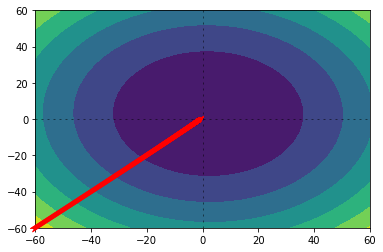

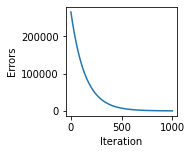

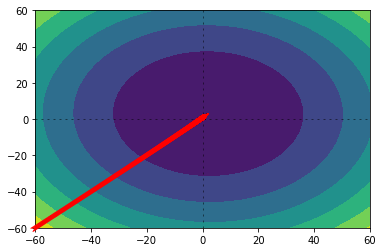

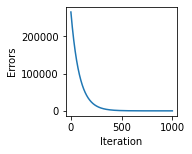

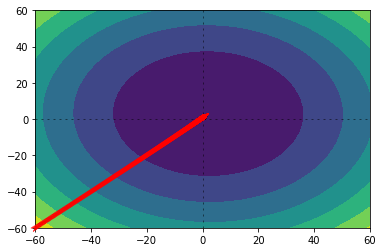

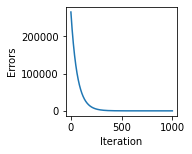

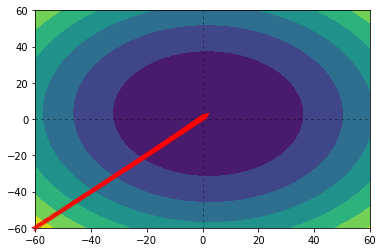

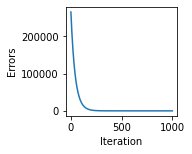

In [19]:
etas = [(0.9*opt_eta)/2,(1.5*opt_eta)/2,opt_eta,1.5*opt_eta]
for eta in etas:
  (w_values,losses)=gradient_descent(X,Y,eta,1000)
  all_ws = np.array(w_values)
  length=len(w_values)
  #print(all_ws.shape)
  countor_plot(w1_new,w2_new,error,length,all_ws,eta)
  plot_error(losses)